<a href="https://colab.research.google.com/github/anjha1/SMS-Spam-Detection-System-Using-NLP-P1-/blob/master/SMS_Spam_Detection_System_Using_NLP_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Load the spam.csv file to inspect its structure and content
import pandas as pd

# Load the CSV file
spam_file_path = '/content/spam.csv'
spam_df = pd.read_csv(spam_file_path, encoding='Windows-1252')

# Display the first few rows of the dataset
print(spam_df.head())
print(spam_df.columns)


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [ ]:
# Step 1: Clean the spam.csv dataset
# Drop unnecessary columns and rename the relevant ones
spam_df = spam_df[['v1', 'v2']]
spam_df.columns = ['label', 'message']

# Display the cleaned dataset's head and check for null values
print(spam_df.head())
print(spam_df.isnull().sum())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label      0
message    0
dtype: int64


In [ ]:
# Add preprocessing steps to the notebook

# Preprocessing the data
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Encode labels
spam_df['label'] = spam_df['label'].map({'ham': 0, 'spam': 1})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(spam_df['message'], spam_df['label'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Machine Learning model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train the model
ml_model = MultinomialNB()
ml_model.fit(X_train_vec, y_train)

# Evaluate the model
ml_predictions = ml_model.predict(X_test_vec)
print('ML Model Accuracy:', accuracy_score(y_test, ml_predictions))
print(classification_report(y_test, ml_predictions))

# Import necessary libraries for Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Tokenize and pad sequences
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build the Deep Learning model
dl_model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dl_model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
dl_loss, dl_accuracy = dl_model.evaluate(X_test_pad, y_test)
print('DL Model Accuracy:', dl_accuracy)


ML Model Accuracy: 0.9838565022421525
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


112/112 ━━━━━━━━━━━━━━━━━━━━ 19s 132ms/step - accuracy: 0.9025 - loss: 0.3032 - val_accuracy: 0.9832 - val_loss: 0.0633
Epoch 2/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.9875 - loss: 0.0509 - val_accuracy: 0.9899 - val_loss: 0.0476
Epoch 3/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.9962 - loss: 0.0155 - val_accuracy: 0.9753 - val_loss: 0.0638
Epoch 4/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.9976 - loss: 0.0115 - val_accuracy: 0.9854 - val_loss: 0.0666
Epoch 5/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 14s 129ms/step - accuracy: 0.9998 - loss: 0.0024 - val_accuracy: 0.9865 - val_loss: 0.0662
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9871 - loss: 0.0712
DL Model Accuracy: 0.9829596281051636


Dataset Shape: (5572, 2)
Class Distribution:
label
0    0.865937
1    0.134063
Name: proportion, dtype: float64


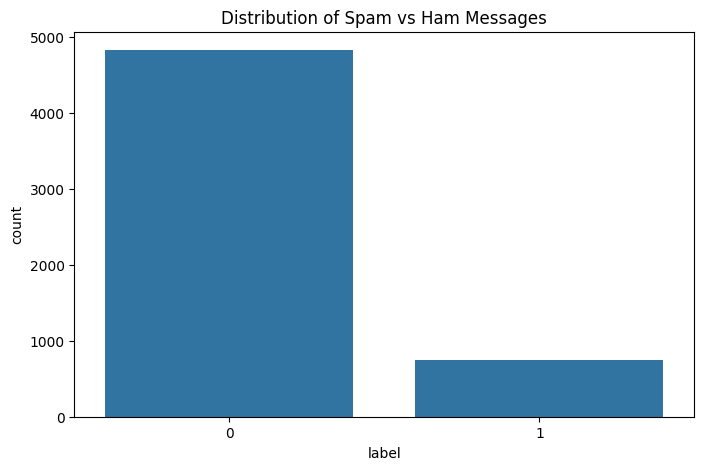

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
df = pd.read_csv('spam.csv', encoding='Windows-1252')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Display basic info
print("Dataset Shape:", df.shape)
print("\
Class Distribution:")
print(df['label'].value_counts(normalize=True))

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='label')
plt.title('Distribution of Spam vs Ham Messages')
plt.show()

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.99      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95

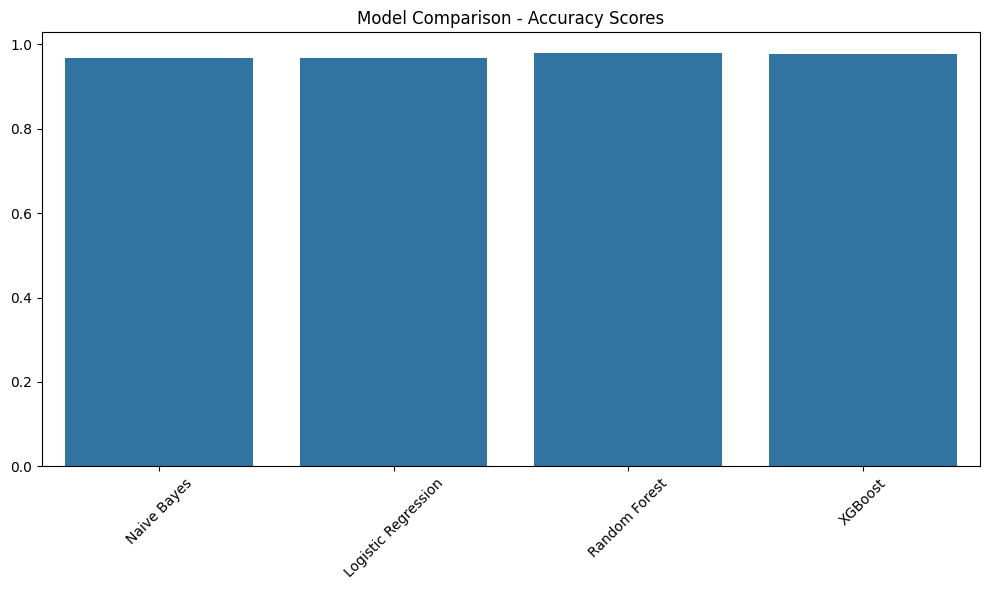

In [ ]:
# Let's implement multiple models and compare their performance

# 1. Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)
print("Naive Bayes Performance:")
print(classification_report(y_test, nb_pred))

# 2. Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)
print("\
Logistic Regression Performance:")
print(classification_report(y_test, lr_pred))

# 3. Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)
print("\
Random Forest Performance:")
print(classification_report(y_test, rf_pred))

# 4. XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_tfidf, y_train)
xgb_pred = xgb_model.predict(X_test_tfidf)
print("\
XGBoost Performance:")
print(classification_report(y_test, xgb_pred))

# Plot model comparison
models = ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, xgb_pred)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison - Accuracy Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Install XGBoost
%pip install xgboost

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



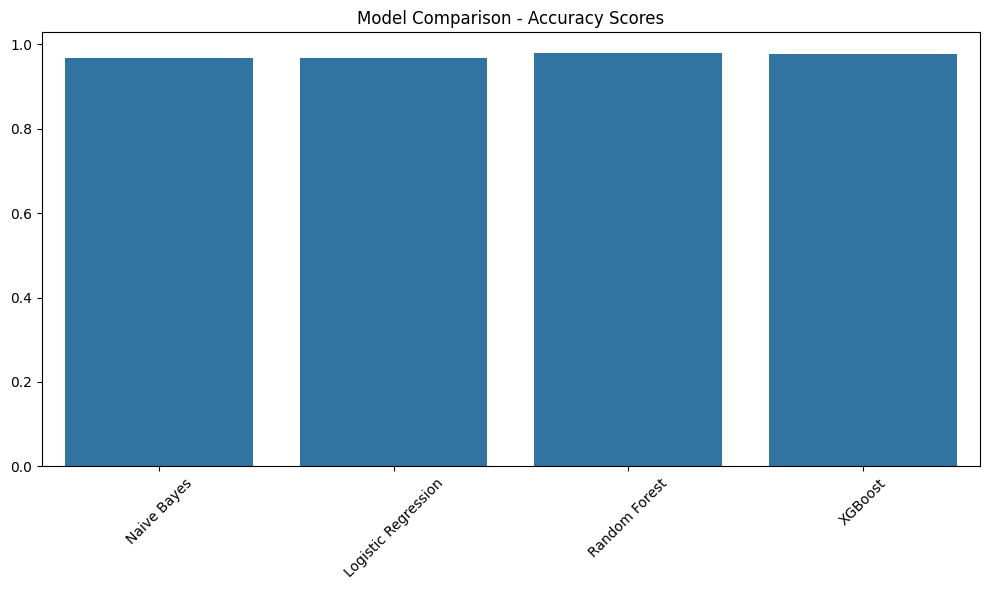

In [ ]:
# Complete XGBoost implementation
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_tfidf, y_train)
xgb_pred = xgb_model.predict(X_test_tfidf)
print("XGBoost Performance:")
print(classification_report(y_test, xgb_pred))

# Plot final model comparison
models = ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, xgb_pred)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison - Accuracy Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='viridis')
plt.title('Class Distribution (Ham vs Spam)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Generate a word cloud for spam messages
spam_messages = X[y == 1]
spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(spam_messages))
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

# Generate a word cloud for ham messages
ham_messages = X[y == 0]
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ham_messages))
plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()

# Visualize feature importance for Random Forest model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-20:]
plt.figure(figsize=(10, 6))
plt.title('Top 20 Feature Importances (Random Forest)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [tfidf_vectorizer.get_feature_names_out()[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Visualize confusion matrix for the best model (Random Forest)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_tfidf, y_test, cmap='viridis')
plt.title('Confusion Matrix - Random Forest')
plt.show()

NameError: name 'y' is not defined

<Figure size 600x400 with 0 Axes>

In [ ]:
# Load and prepare the data
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Read the dataset
df = pd.read_csv('spam.csv', encoding='Windows-1252')
df = df.iloc[:, [0, 1]]  # Select first two columns
df.columns = ['label', 'message']  # Rename columns

# Prepare features and target
X = df['message']
y = (df['label'] == 'spam').astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Data prepared successfully")

Data prepared successfully


<ipython-input-12-7969c12695da>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


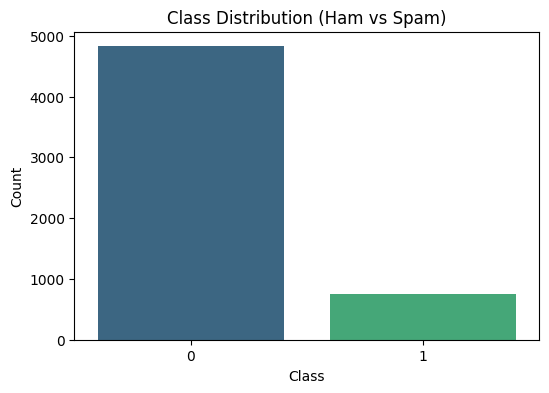

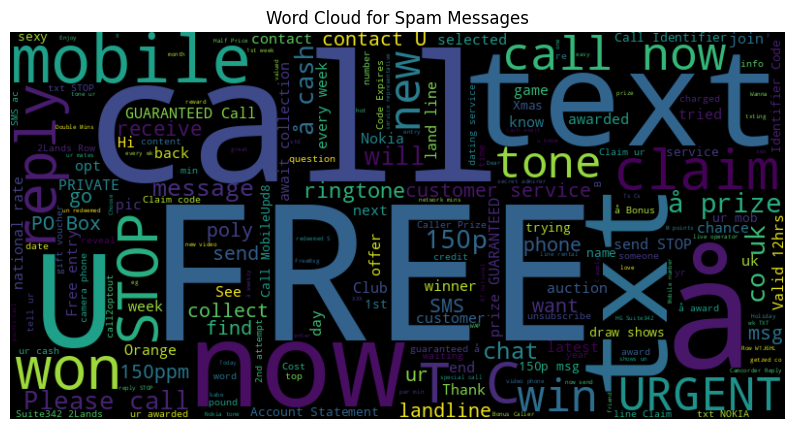

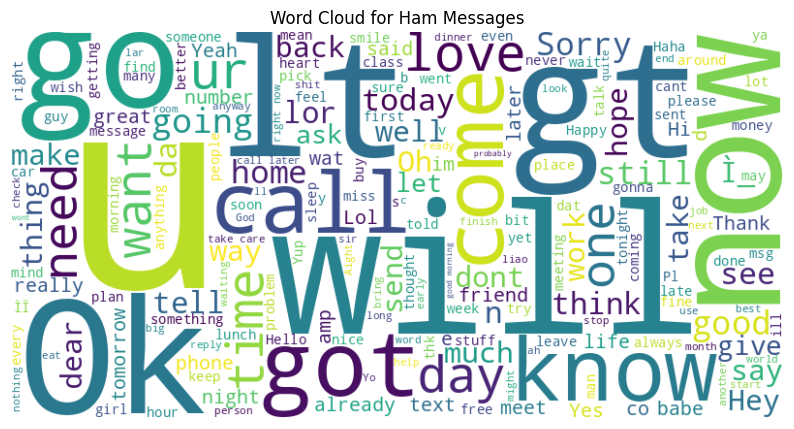

In [ ]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='viridis')
plt.title('Class Distribution (Ham vs Spam)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Generate a word cloud for spam messages
spam_messages = df[df['label'] == 'spam']['message']
spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(spam_messages))
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

# Generate a word cloud for ham messages
ham_messages = df[df['label'] == 'ham']['message']
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ham_messages))
plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()

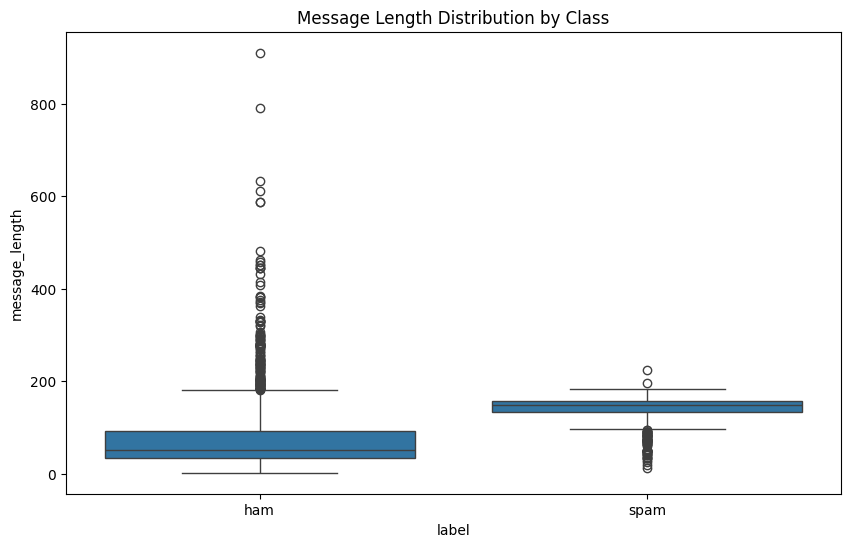

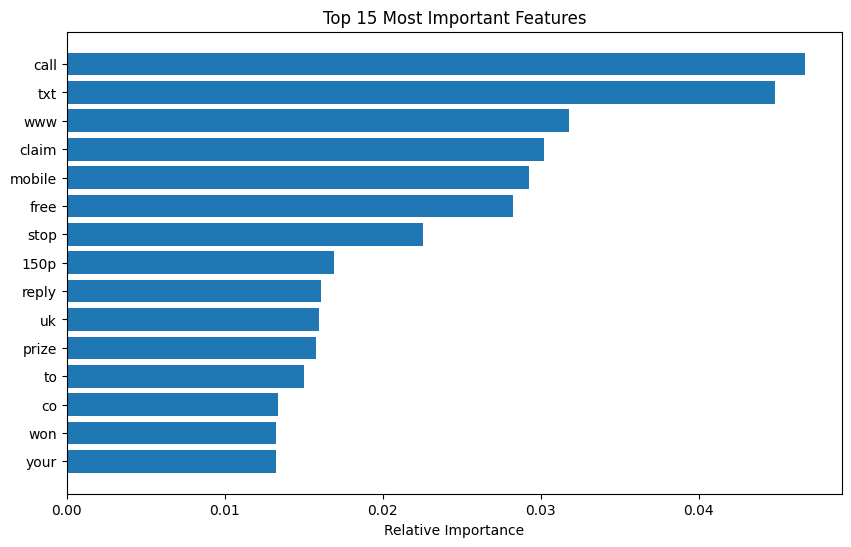

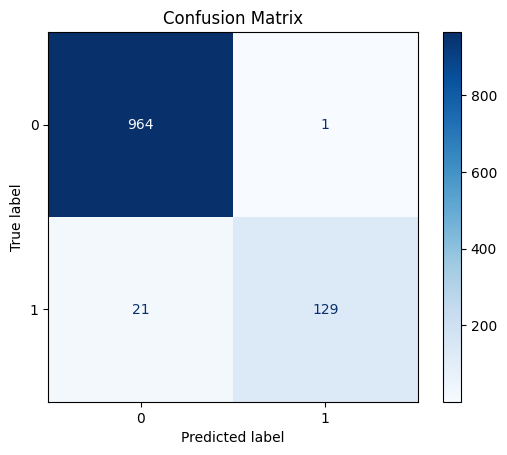

In [ ]:
# Train a Random Forest model for feature importance visualization
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Message length distribution
df['message_length'] = df['message'].str.len()

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='message_length', data=df)
plt.title('Message Length Distribution by Class')
plt.show()

# Feature importance plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-15:]
plt.figure(figsize=(10, 6))
plt.title('Top 15 Most Important Features')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [tfidf_vectorizer.get_feature_names_out()[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Model performance metrics visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf_model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the necessary components for deployment
import pickle

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Save the Random Forest model
with open('spam_classifier_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Models saved successfully as 'tfidf_vectorizer.pkl' and 'spam_classifier_model.pkl'")

Models saved successfully as 'tfidf_vectorizer.pkl' and 'spam_classifier_model.pkl'
